In [ ]:
!pip install -U imbalanced-learn
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/sample_data/Customer-Churn.csv')
data.shape

(7043, 18)

In [ ]:
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [ ]:
# modify values manualy
map = {
    'Sim': 1,
    'Nao': 0
}
modified_data = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(map)
modified_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
# mofify values with get dummies
dummy_data = pd.get_dummies(data.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))

# union data with modified data values
final_data = pd.concat([modified_data, dummy_data], axis=1)
final_data.shape

(7043, 39)

In [ ]:
pd.set_option('display.max_columns', 39)
final_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


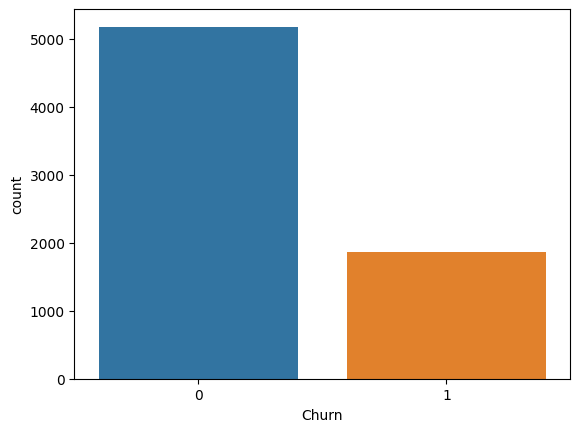

In [ ]:
ax = sns.countplot(x='Churn', data=final_data)

In [ ]:
# SMOTE balancing data
x = final_data.drop('Churn', axis = 1)
y = final_data['Churn']

smt = SMOTE(random_state=123)
x, y = smt.fit_resample(x, y)

final_data_balancing = pd.concat([x, y], axis=1)
final_data_balancing.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


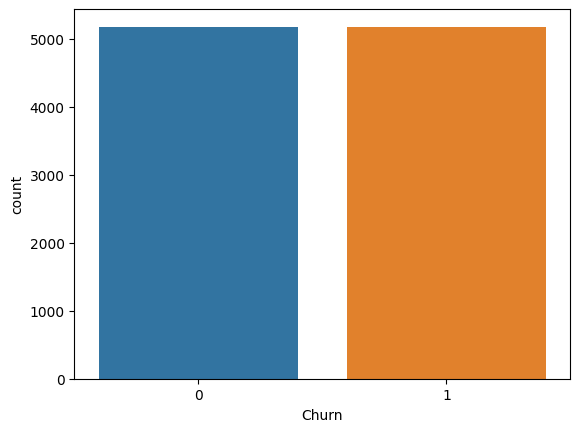

In [ ]:
ax = sns.countplot(x='Churn', data=final_data_balancing)

In [ ]:
# KNN K-Nearest Neightbors Algorithm (https://www.ibm.com/topics/knn#:~:text=Next%20steps-,K%2DNearest%20Neighbors%20Algorithm,of%20an%20individual%20data%20point.)

from sklearn.preprocessing import StandardScaler

x_exercise = final_data.drop('Churn', axis=1)
y_exercise = final_data['Churn']

norm = StandardScaler()
x_norm = norm.fit_transform(x_exercise)
x_norm[0]

array([ 1.03453023, -0.65401193, -3.05401039,  0.8297975 , -0.43991649,
       -1.27744458, -1.16032292, -0.96332984,  3.05401039, -0.85417615,
        1.38171215, -0.88565976, -0.52592737,  1.00669571, -0.52592737,
       -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
       -0.52592737, -0.72396752,  1.0138687 , -0.52592737, -0.63943864,
        1.2273572 , -0.52592737, -0.79013171,  1.23648892, -0.52592737,
       -0.79607014, -0.56297505,  0.90418382, -0.51424938, -0.52504733,
        1.40641839, -0.54480692, -0.5298852 ])

In [ ]:
x_test_values = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
x_test_norm = norm.transform(pd.DataFrame(x_test_values, columns = x_exercise.columns))
x_test_norm

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.32743831, -0.85417615,
        -0.72373975,  1.12910177, -0.52592737,  1.00669571, -0.52592737,
        -0.63393298, -0.88361972, -0.52592737,  1.3782406 ,  1.12942721,
         1.90140322, -0.72396752, -0.98632101,  1.90140322, -0.63943864,
         1.2273572 , -0.52592737, -0.79013171, -0.80874158, -0.52592737,
         1.25617071, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_exercise, test_size=0.3, random_state=123)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_train, y_train)
predict_knn = knn.predict(x_test)
predict_knn

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
x_train

array([[-0.96662231, -0.65401193, -3.05401039, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [ 1.03453023,  1.5290241 ,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 1.03453023,  1.5290241 , -3.05401039, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.96662231, -0.65401193,  0.32743831, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [ ]:
y_train

1479    0
2377    0
6613    0
6468    0
2668    1
       ..
5218    0
4060    0
1346    1
3454    0
3582    0
Name: Churn, Length: 4930, dtype: int64

In [ ]:
np.median(x_train)

-0.5259273725834717

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.52)
bnb.fit(x_train, y_train)

BernoulliNB(binarize=0.52)

In [ ]:
predict_bnb = bnb.predict(x_test)
predict_bnb

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(x_train, y_train)
dtc.feature_importances_

array([0.03168742, 0.01862901, 0.00064085, 0.02675693, 0.0208788 ,
       0.2056003 , 0.29546501, 0.0061786 , 0.00273035, 0.00747536,
       0.        , 0.04908356, 0.        , 0.01609395, 0.        ,
       0.00722833, 0.01220706, 0.        , 0.01248286, 0.01138295,
       0.0006673 , 0.0095669 , 0.01841631, 0.        , 0.00650511,
       0.00385849, 0.        , 0.00666929, 0.00517146, 0.        ,
       0.00665371, 0.00473251, 0.15803541, 0.00348686, 0.01414378,
       0.01601964, 0.01064163, 0.01091026])

In [ ]:
predict_dtc = dtc.predict(x_test)
predict_dtc

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_knn))

[[1305  218]
 [ 317  273]]


In [ ]:
print(confusion_matrix(y_test, predict_bnb))

[[1058  465]
 [ 120  470]]


In [ ]:
print(confusion_matrix(y_test, predict_dtc))

[[1249  274]
 [ 290  300]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_knn))

0.7468054898248935


In [ ]:
print(accuracy_score(y_test, predict_bnb))

0.7231424514907714


In [ ]:
print(accuracy_score(y_test, predict_dtc))

0.7330809275911027


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predict_knn))

0.5560081466395111


In [ ]:
print(precision_score(y_test, predict_bnb))

0.5026737967914439


In [ ]:
print(precision_score(y_test, predict_dtc))

0.5226480836236934


In [ ]:
from sklearn.metrics import recall_score
print(recall_score(y_test, predict_knn))

0.46271186440677964


In [ ]:
print(recall_score(y_test, predict_bnb))

0.7966101694915254


In [ ]:
print(recall_score(y_test, predict_dtc))

0.5084745762711864
